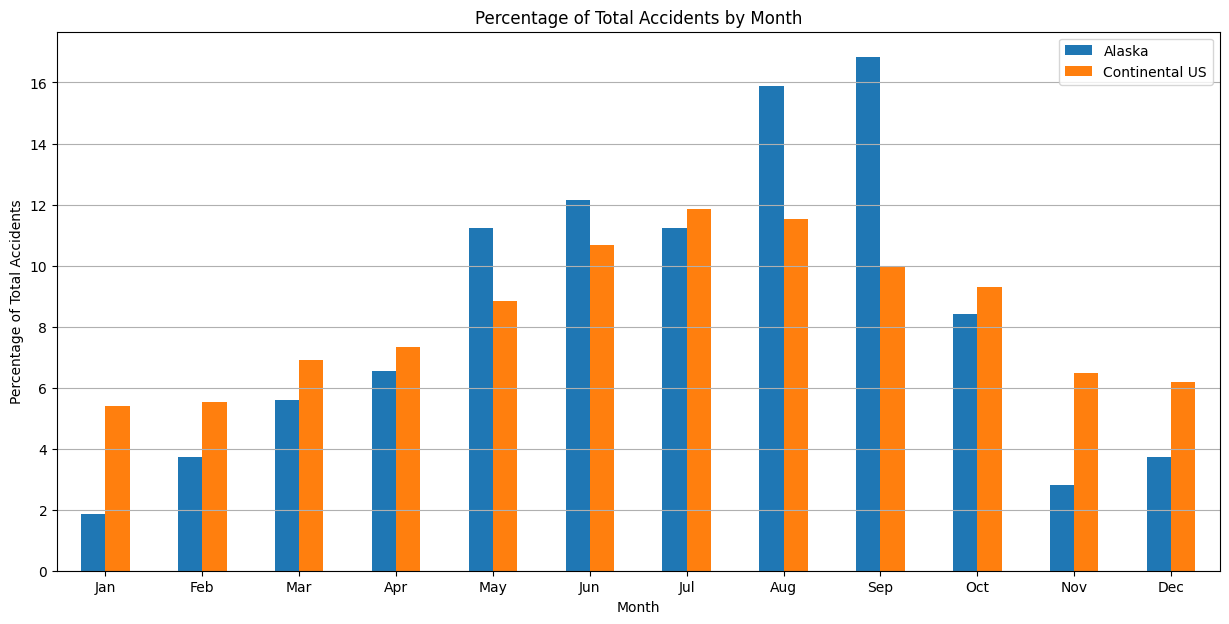

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'  # Replace with the path to your file
accidents_df = pd.read_excel(file_path, sheet_name='Accidents')
findings_df = pd.read_excel(file_path, sheet_name='Findings')
accidents_df = accidents_df[(accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0)] #* Filter by fatal or serious injuries only

# Add a Month column based on the EventDate
accidents_df['Month'] = accidents_df['EventDate'].dt.month

# Calculate monthly totals for Alaska
alaska_accidents = accidents_df[accidents_df['StateOrRegion'] == 'Alaska']
alaska_monthly_totals = alaska_accidents.groupby('Month').size()
alaska_annual_total = alaska_monthly_totals.sum()
alaska_monthly_percentages = (alaska_monthly_totals / alaska_annual_total) * 100

# Calculate monthly totals for the Continental US
continental_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') & 
    (accidents_df['StateOrRegion'] != 'Hawaii')
]
continental_us_monthly_totals = continental_us_accidents.groupby('Month').size()
continental_us_annual_total = continental_us_monthly_totals.sum()
continental_us_monthly_percentages = (continental_us_monthly_totals / continental_us_annual_total) * 100

# Combine the data into a single DataFrame
combined_data = pd.DataFrame({
    'Alaska': alaska_monthly_percentages,
    'Continental US': continental_us_monthly_percentages
})

# Plotting the grouped bar chart
combined_data.plot(kind='bar', figsize=(15, 7))

plt.title('Percentage of Total Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()


C:\Users\zkhan\AppData\Local\Temp\ipykernel_27400\4136378357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Month'] = accidents['EventDate'].dt.month
C:\Users\zkhan\AppData\Local\Temp\ipykernel_27400\4136378357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Month'] = accidents['EventDate'].dt.month


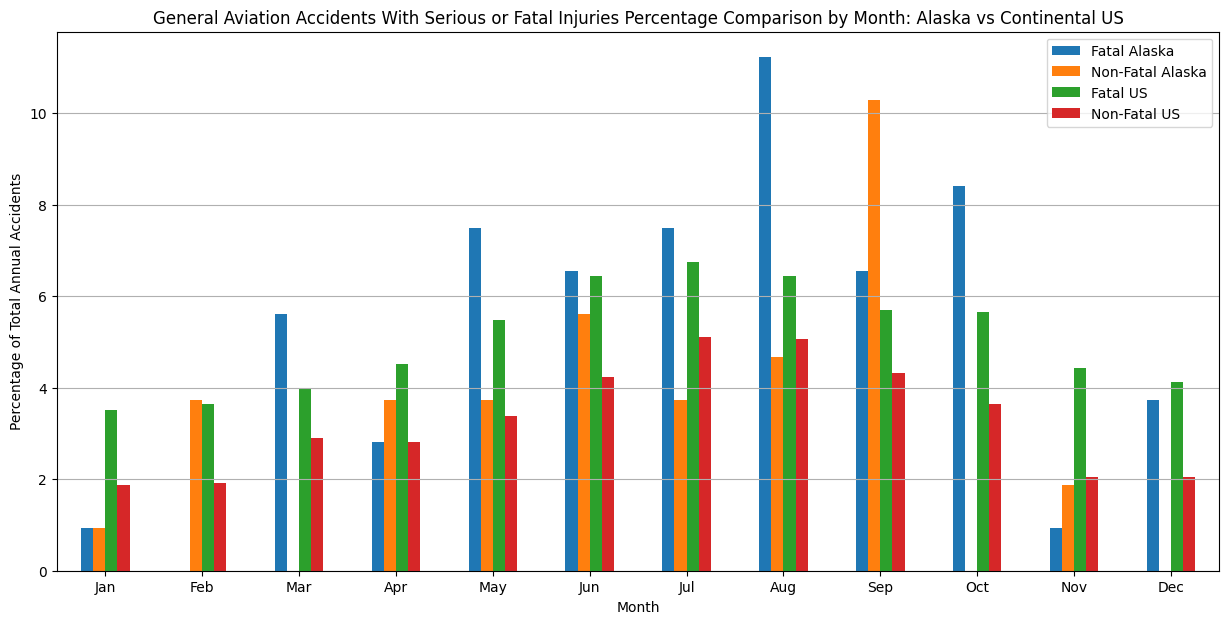

In [35]:

# Function to calculate percentages relative to the total annual accidents
def calculate_annual_percentages(accidents):
    accidents['Month'] = accidents['EventDate'].dt.month
    annual_total = len(accidents)
    monthly_injury = accidents.groupby(['Month', 'InjuryLevel']).size().unstack(fill_value=0)
    return (monthly_injury.divide(annual_total, axis=0) * 100)

# Filter and calculate percentages for Alaska
alaska_accidents = accidents_df[accidents_df['StateOrRegion'] == 'Alaska']
alaska_annual_percentages = calculate_annual_percentages(alaska_accidents)

# Filter and calculate percentages for the Continental US
continental_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') & 
    (accidents_df['StateOrRegion'] != 'Hawaii')
]
continental_us_annual_percentages = calculate_annual_percentages(continental_us_accidents)

# Merge the two datasets for side-by-side comparison
merged_percentages = pd.concat([alaska_annual_percentages.add_suffix(' Alaska'), continental_us_annual_percentages.add_suffix(' US')], axis=1)

# Plotting the grouped bar chart
merged_percentages.plot(kind='bar', figsize=(15, 7))

plt.title('General Aviation Accidents With Serious or Fatal Injuries Percentage Comparison by Month: Alaska vs Continental US')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Annual Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()

C:\Users\zkhan\AppData\Local\Temp\ipykernel_27400\481531159.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alaska_env_accidents['Month'] = alaska_env_accidents['EventDate'].dt.month
C:\Users\zkhan\AppData\Local\Temp\ipykernel_27400\481531159.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_env_accidents['Month'] = us_env_accidents['EventDate'].dt.month


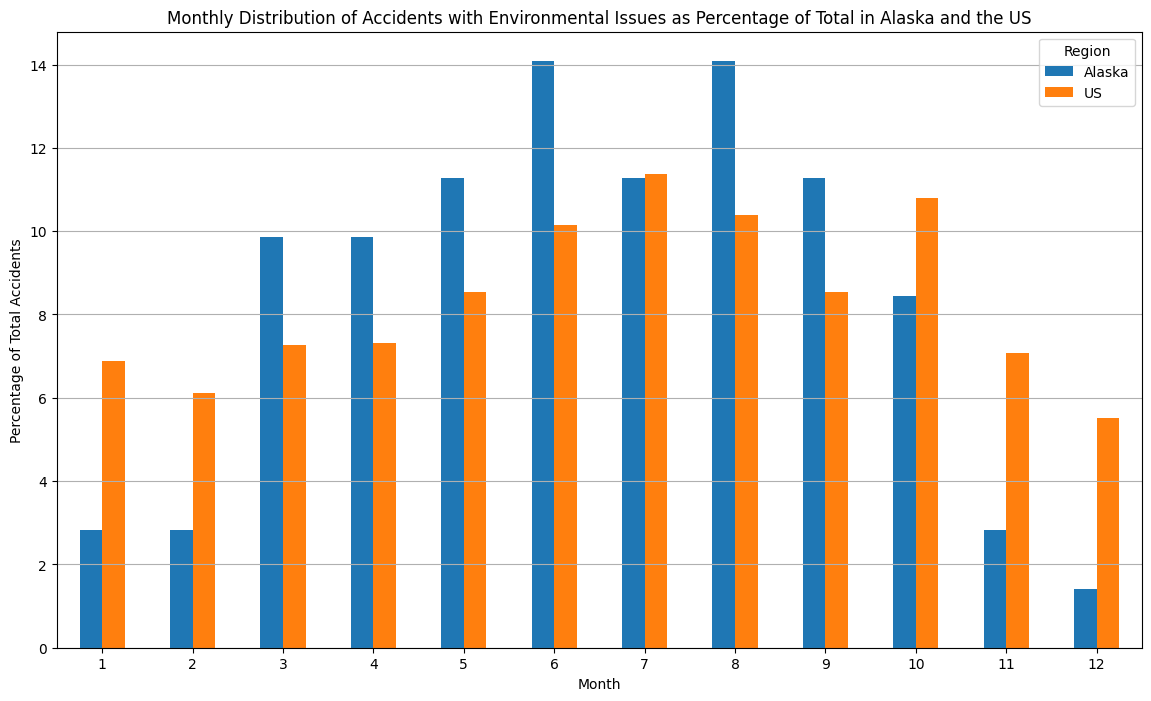

In [31]:
# Filtering accidents with fatal injuries or serious injuries
accidents_fatal_serious = accidents_df[(accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0)]

# Merging with findings to get those accidents with 'Environmental issues'
accidents_with_env_issues = pd.merge(accidents_fatal_serious, findings_df[findings_df['Category'] == 'Environmental issues'], on='MKey')

# Filtering for Alaska and US excluding Alaska and Hawaii
alaska_env_accidents = accidents_with_env_issues[accidents_with_env_issues['StateOrRegion'] == 'Alaska']
us_env_accidents = accidents_with_env_issues[(accidents_with_env_issues['Country'] == 'United States') & 
                                             (~accidents_with_env_issues['StateOrRegion'].isin(['Alaska', 'Hawaii']))]

# Extracting the month from the EventDate
alaska_env_accidents['Month'] = alaska_env_accidents['EventDate'].dt.month
us_env_accidents['Month'] = us_env_accidents['EventDate'].dt.month

# Count of accidents by month
monthly_counts_alaska = alaska_env_accidents['Month'].value_counts().sort_index()
monthly_counts_us = us_env_accidents['Month'].value_counts().sort_index()

# Creating a DataFrame for plotting
monthly_comparison_df = pd.DataFrame({'Alaska': monthly_counts_alaska, 'US': monthly_counts_us}).fillna(0)
# Extracting the month from the EventDate for all accidents
accidents_fatal_serious['Month'] = accidents_fatal_serious['EventDate'].dt.month

# Filtering for Alaska and US excluding Alaska and Hawaii, and then joining with findings
alaska_fatal_serious_env = accidents_fatal_serious[accidents_fatal_serious['StateOrRegion'] == 'Alaska']
us_fatal_serious_env = accidents_fatal_serious[(accidents_fatal_serious['Country'] == 'United States') & 
                                               (~accidents_fatal_serious['StateOrRegion'].isin(['Alaska', 'Hawaii']))]

alaska_env_merged = pd.merge(alaska_fatal_serious_env, findings_df[findings_df['Category'] == 'Environmental issues'], on='MKey', how='inner')
us_env_merged = pd.merge(us_fatal_serious_env, findings_df[findings_df['Category'] == 'Environmental issues'], on='MKey', how='inner')

# Counting accidents by month for Alaska and US
alaska_monthly_counts = alaska_env_merged['Month'].value_counts().sort_index()
us_monthly_counts = us_env_merged['Month'].value_counts().sort_index()

# Recalculating the monthly counts as percentages of the total number of accidents for Alaska and US
alaska_monthly_percent = (alaska_monthly_counts / alaska_monthly_counts.sum()) * 100
us_monthly_percent = (us_monthly_counts / us_monthly_counts.sum()) * 100

# Creating a DataFrame for plotting percentages
monthly_percent_comparison_df = pd.DataFrame({'Alaska': alaska_monthly_percent, 'US': us_monthly_percent}).fillna(0)

# Plotting the data as side by side bars on a bar chart
monthly_percent_comparison_df.plot(kind='bar', figsize=(14, 8))
plt.title('Monthly Distribution of Accidents with Environmental Issues as Percentage of Total in Alaska and the US')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Accidents')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.grid(axis='y')

plt.show()

C:\Users\zkhan\AppData\Local\Temp\ipykernel_27400\2939214684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_accidents['Year'] = monthly_accidents['EventDate'].dt.year
C:\Users\zkhan\AppData\Local\Temp\ipykernel_27400\2939214684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_accidents['Year'] = monthly_accidents['EventDate'].dt.year


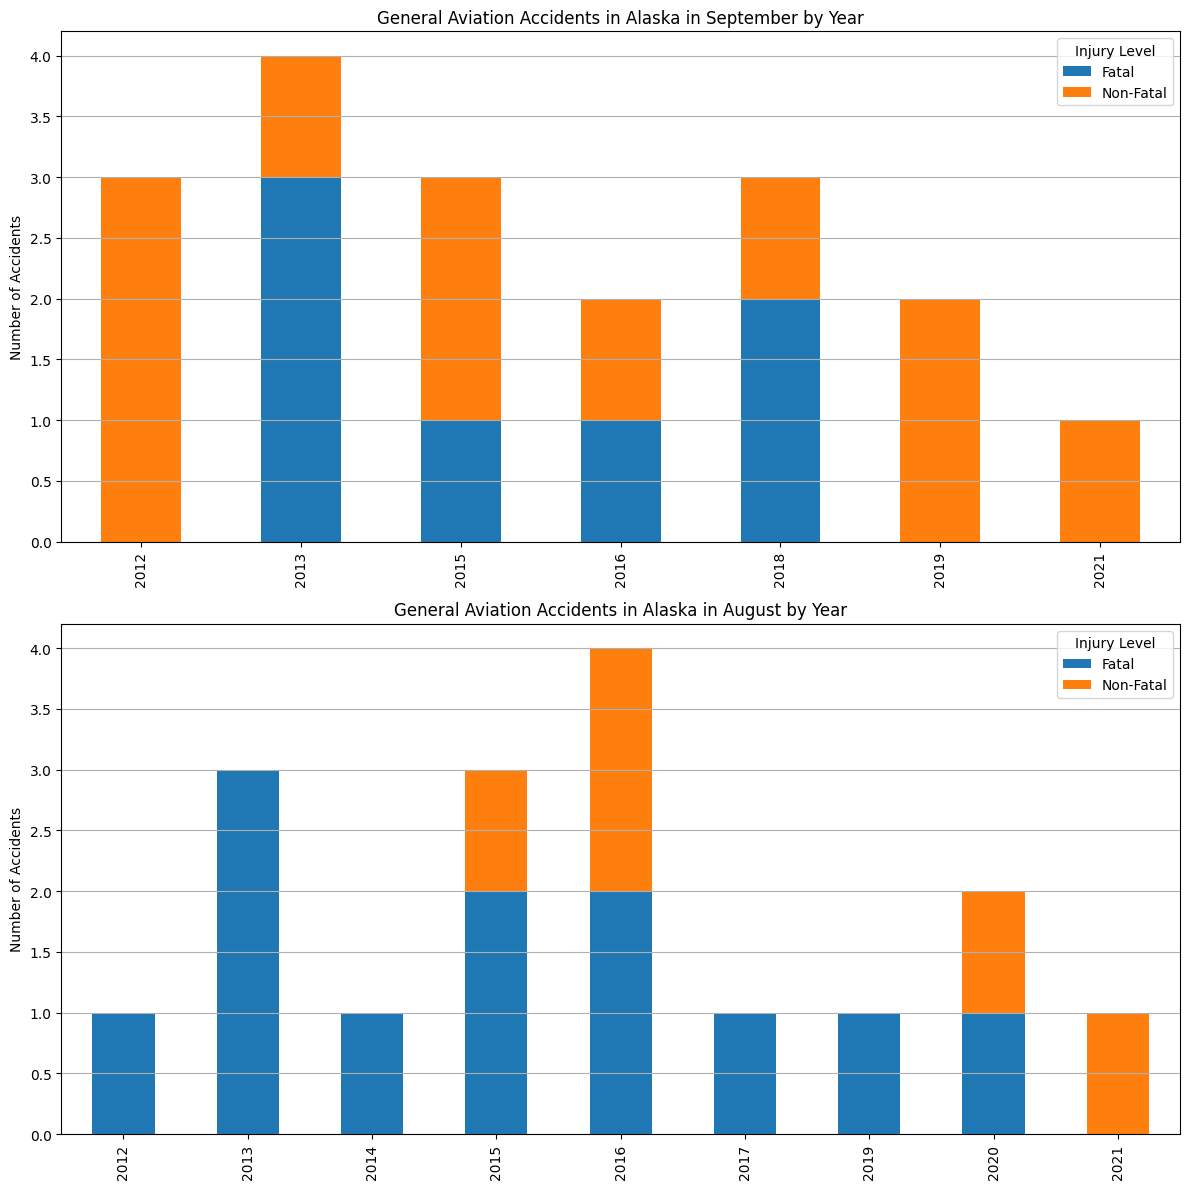

In [34]:
import matplotlib.pyplot as plt

# Function to prepare accident data for a given month
def prepare_monthly_data(df, month):
    monthly_accidents = df[
        (df['StateOrRegion'] == 'Alaska') & 
        (df['EventDate'].dt.month == month)
    ]
    monthly_accidents['Year'] = monthly_accidents['EventDate'].dt.year
    return monthly_accidents.groupby(['Year', 'InjuryLevel']).size().unstack(fill_value=0)

# Preparing data for September and August
september_accidents = prepare_monthly_data(accidents_df, 9)
august_accidents = prepare_monthly_data(accidents_df, 8)

# Plotting the bar charts as subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# September accidents plot
september_accidents.plot(kind='bar', stacked=True, ax=axes[0], title='General Aviation Accidents in Alaska in September by Year')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Accidents')
axes[0].legend(title='Injury Level')
axes[0].grid(axis='y')

# August accidents plot
august_accidents.plot(kind='bar', stacked=True, ax=axes[1], title='General Aviation Accidents in Alaska in August by Year')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Accidents')
axes[1].legend(title='Injury Level')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()